# Cancer Type Predictor

This project aims to construct a machine learning classifier that can predict the cancer type based on gene expression data from patients with different types of cancer: BRCA, KIRK, COAD, LUAD, and PRAD.

The data comes from the __[UC Irvine Machine Learning Repository](https://archive.ics.uci.edu/dataset/401/gene+expression+cancer+rna+seq)__. The expression data was obtained from an RNA-Seq (HiSeq) PANCAN experiment. 

## Library Import

In [62]:
# Import Libraries

# Data Manipulation
import pandas as pd
import numpy as np

# Data Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Machine Learning - preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import label_binarize
from sklearn.preprocessing import MinMaxScaler

# Machine Learning - feature selection
from sklearn.feature_selection import mutual_info_classif

# Machine Learning - models
from sklearn.ensemble import RandomForestClassifier
from sklearn.multiclass import OneVsRestClassifier

# Machine Learning - evaluation
from sklearn.metrics import classification_report
from sklearn.metrics import balanced_accuracy_score, f1_score, precision_score, recall_score
from sklearn.metrics import roc_auc_score, roc_curve, auc
from sklearn.metrics import confusion_matrix

## Data Import

In [ ]:
# Retrieving feature data
filepath = '/Users/nickwinters/desktop/DS_Projects/Python/Bioinformatics/MLcancerPred/TCGA-PANCAN-HiSeq-801x20531/data.csv'
data = pd.read_csv(filepath)

In [ ]:
# Retrieving label data
filepath2 = '/Users/nickwinters/desktop/DS_Projects/Python/Bioinformatics/MLcancerPred/TCGA-PANCAN-HiSeq-801x20531/labels.csv'
labels = pd.read_csv(filepath2)

In [ ]:
# viewing the first few rows of the data
print(data.head())

  Unnamed: 0  gene_0    gene_1    gene_2    gene_3     gene_4  gene_5  \
0   sample_0     0.0  2.017209  3.265527  5.478487  10.431999     0.0   
1   sample_1     0.0  0.592732  1.588421  7.586157   9.623011     0.0   
2   sample_2     0.0  3.511759  4.327199  6.881787   9.870730     0.0   
3   sample_3     0.0  3.663618  4.507649  6.659068  10.196184     0.0   
4   sample_4     0.0  2.655741  2.821547  6.539454   9.738265     0.0   

     gene_6    gene_7  gene_8  ...  gene_20521  gene_20522  gene_20523  \
0  7.175175  0.591871     0.0  ...    4.926711    8.210257    9.723516   
1  6.816049  0.000000     0.0  ...    4.593372    7.323865    9.740931   
2  6.972130  0.452595     0.0  ...    5.125213    8.127123   10.908640   
3  7.843375  0.434882     0.0  ...    6.076566    8.792959   10.141520   
4  6.566967  0.360982     0.0  ...    5.996032    8.891425   10.373790   

   gene_20524  gene_20525  gene_20526  gene_20527  gene_20528  gene_20529  \
0    7.220030    9.119813   12.003135  

In [ ]:
# viewing the first few rows of the labels
print(labels.head())

  Unnamed: 0 Class
0   sample_0  PRAD
1   sample_1  LUAD
2   sample_2  PRAD
3   sample_3  PRAD
4   sample_4  BRCA


## Data Processing

In [ ]:
# Cleaning the data by removing unnecessary columns
cleaned_labs = labels.drop(columns=['Unnamed: 0'])
print(cleaned_labs.head())

  Class
0  PRAD
1  LUAD
2  PRAD
3  PRAD
4  BRCA


In [ ]:
# Combining feature data and cleaned labels
df = pd.concat([data, cleaned_labs], axis=1)
df_cleaned = df.drop(columns=['Unnamed: 0'])
print(df_cleaned.head())

   gene_0    gene_1    gene_2    gene_3     gene_4  gene_5    gene_6  \
0     0.0  2.017209  3.265527  5.478487  10.431999     0.0  7.175175   
1     0.0  0.592732  1.588421  7.586157   9.623011     0.0  6.816049   
2     0.0  3.511759  4.327199  6.881787   9.870730     0.0  6.972130   
3     0.0  3.663618  4.507649  6.659068  10.196184     0.0  7.843375   
4     0.0  2.655741  2.821547  6.539454   9.738265     0.0  6.566967   

     gene_7  gene_8  gene_9  ...  gene_20522  gene_20523  gene_20524  \
0  0.591871     0.0     0.0  ...    8.210257    9.723516    7.220030   
1  0.000000     0.0     0.0  ...    7.323865    9.740931    6.256586   
2  0.452595     0.0     0.0  ...    8.127123   10.908640    5.401607   
3  0.434882     0.0     0.0  ...    8.792959   10.141520    8.942805   
4  0.360982     0.0     0.0  ...    8.891425   10.373790    7.181162   

   gene_20525  gene_20526  gene_20527  gene_20528  gene_20529  gene_20530  \
0    9.119813   12.003135    9.650743    8.921326    5.28

In [ ]:
# Identifying columns with all zeros
all_zeros = df_cleaned.loc[:, (df_cleaned == 0).all()]
print(all_zeros.shape)
print(all_zeros.head())

(801, 267)
   gene_5  gene_23  gene_4370  gene_4808  gene_4809  gene_4814  gene_4816  \
0     0.0      0.0        0.0        0.0        0.0        0.0        0.0   
1     0.0      0.0        0.0        0.0        0.0        0.0        0.0   
2     0.0      0.0        0.0        0.0        0.0        0.0        0.0   
3     0.0      0.0        0.0        0.0        0.0        0.0        0.0   
4     0.0      0.0        0.0        0.0        0.0        0.0        0.0   

   gene_4817  gene_4831  gene_5288  ...  gene_18908  gene_18909  gene_18910  \
0        0.0        0.0        0.0  ...         0.0         0.0         0.0   
1        0.0        0.0        0.0  ...         0.0         0.0         0.0   
2        0.0        0.0        0.0  ...         0.0         0.0         0.0   
3        0.0        0.0        0.0  ...         0.0         0.0         0.0   
4        0.0        0.0        0.0  ...         0.0         0.0         0.0   

   gene_18911  gene_18914  gene_18915  gene_19450  

In [72]:
# Drop all-zero columns from dataset
existing_columns = all_zeros.columns.intersection(df_cleaned.columns)
df_final = df_cleaned.drop(columns=existing_columns)
print(df_final.shape)
print(df_final.head())

(801, 20265)
   gene_0    gene_1    gene_2    gene_3     gene_4    gene_6    gene_7  \
0     0.0  2.017209  3.265527  5.478487  10.431999  7.175175  0.591871   
1     0.0  0.592732  1.588421  7.586157   9.623011  6.816049  0.000000   
2     0.0  3.511759  4.327199  6.881787   9.870730  6.972130  0.452595   
3     0.0  3.663618  4.507649  6.659068  10.196184  7.843375  0.434882   
4     0.0  2.655741  2.821547  6.539454   9.738265  6.566967  0.360982   

   gene_8  gene_9   gene_10  ...  gene_20522  gene_20523  gene_20524  \
0     0.0     0.0  0.591871  ...    8.210257    9.723516    7.220030   
1     0.0     0.0  0.000000  ...    7.323865    9.740931    6.256586   
2     0.0     0.0  0.000000  ...    8.127123   10.908640    5.401607   
3     0.0     0.0  0.000000  ...    8.792959   10.141520    8.942805   
4     0.0     0.0  0.000000  ...    8.891425   10.373790    7.181162   

   gene_20525  gene_20526  gene_20527  gene_20528  gene_20529  gene_20530  \
0    9.119813   12.003135    9.6

In [ ]:
# Checking for NaN values in the cleaned dataset
nulldata = df_final.isnull().sum()
number_nans = nulldata.sum()
print(f'The total number of NaN values in the dataset is: {number_nans}')

The total number of NaN values in the dataset is: 0


## Data Visualization

In [ ]:
# Checking class distribution
print(df_final['Class'].value_counts())

Class
BRCA    300
KIRC    146
LUAD    141
PRAD    136
COAD     78
Name: count, dtype: int64


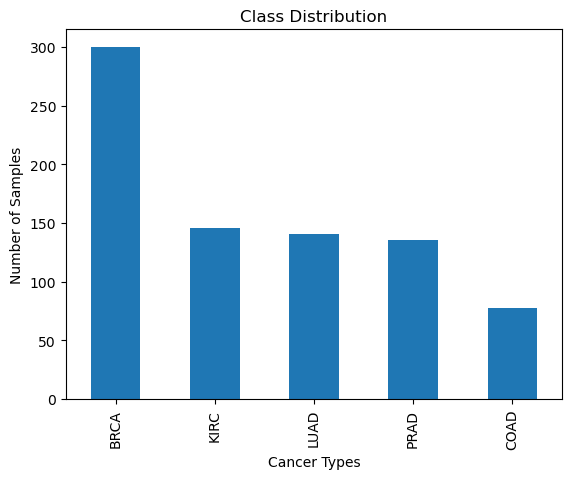

In [ ]:
# Visualizing class distribution
df_final['Class'].value_counts().plot(kind='bar')
plt.title('Class Distribution')
plt.xlabel('Cancer Types')
plt.ylabel('Number of Samples')
plt.show()

## Preparing the Data for Machine Learning

In [ ]:
# Splitting features and labels
Y = df_final['Class']
X = df_final.drop(columns=['Class'])

In [77]:
Y.head()


0    PRAD
1    LUAD
2    PRAD
3    PRAD
4    BRCA
Name: Class, dtype: object

In [78]:
X.head()

,gene_0,gene_1,gene_2,gene_3,gene_4,gene_6,gene_7,gene_8,gene_9,gene_10,...,gene_20521,gene_20522,gene_20523,gene_20524,gene_20525,gene_20526,gene_20527,gene_20528,gene_20529,gene_20530
0,0.0,2.017209,3.265527,5.478487,10.431999,7.175175,0.591871,0.0,0.0,0.591871,...,4.926711,8.210257,9.723516,7.220030,9.119813,12.003135,9.650743,8.921326,5.286759,0.0
1,0.0,0.592732,1.588421,7.586157,9.623011,6.816049,0.000000,0.0,0.0,0.000000,...,4.593372,7.323865,9.740931,6.256586,8.381612,12.674552,10.517059,9.397854,2.094168,0.0
2,0.0,3.511759,4.327199,6.881787,9.870730,6.972130,0.452595,0.0,0.0,0.000000,...,5.125213,8.127123,10.908640,5.401607,9.911597,9.045255,9.788359,10.090470,1.683023,0.0
3,0.0,3.663618,4.507649,6.659068,10.196184,7.843375,0.434882,0.0,0.0,0.000000,...,6.076566,8.792959,10.141520,8.942805,9.601208,11.392682,9.694814,9.684365,3.292001,0.0
4,0.0,2.655741,2.821547,6.539454,9.738265,6.566967,0.360982,0.0,0.0,0.000000,...,5.996032,8.891425,10.373790,7.181162,9.846910,11.922439,9.217749,9.461191,5.110372,0.0


In [ ]:
# Encoding labels
label_encoder = LabelEncoder()
label_encoder.fit(Y)
Y_encoded = label_encoder.transform(Y)
label = label_encoder.classes_
classes = np.unique(Y_encoded)

In [80]:
label

array(['BRCA', 'COAD', 'KIRC', 'LUAD', 'PRAD'], dtype=object)

In [81]:
classes

array([0, 1, 2, 3, 4])

In [ ]:
# Splitting data into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y_encoded, test_size=0.2, random_state=42)   

In [ ]:
# Feature Scaling using Min-Max Scaler
min_max_scaler = MinMaxScaler()
X_train_scaled = min_max_scaler.fit_transform(X_train)
X_test_scaled = min_max_scaler.transform(X_test)

In [ ]:
# Feature Selection using Mutual Information
MI= mutual_info_classif(X_train_scaled, Y_train)

n_features = 300
selected_scores = np.argsort(MI)[::-1][0:n_features]

X_train_selected = X_train_scaled[:, selected_scores]
X_test_selected = X_test_scaled[:, selected_scores]

In [85]:
X_train_selected.shape

(640, 300)

In [86]:
X_test_selected.shape

(161, 300)

## Building and Training the Model

In [ ]:
# Building a one-vs-rest Random Forest Classifier
RF = OneVsRestClassifier(RandomForestClassifier(max_features=0.2, random_state=42))
RF.fit(X_train_selected, Y_train)
Y_pred = RF.predict(X_test_selected)
Y_prob = RF.predict_proba(X_test_selected)

## Model Evaulation

In [88]:
# accuracy
accuracy = np.round(balanced_accuracy_score(Y_test, Y_pred), 4)
print(f'Accuracy:%0.4f' %accuracy)

# precision
precision = np.round(precision_score(Y_test, Y_pred, average='weighted'), 4)
print(f'Precision:%0.4f' %precision)

# recall
recall = np.round(recall_score(Y_test, Y_pred, average='weighted'), 4)
print(f'Recall:%0.4f' %recall)

# F1 Score
f1 = np.round(f1_score(Y_test, Y_pred, average='weighted'), 4)
print(f'F1 Score:%0.4f' %f1)    

# Classification Report
report = classification_report(Y_test, Y_pred, target_names=label)
print('\n')
print('Classification Report:\n\n')
print(report)

Accuracy:1.0000
Precision:1.0000
Recall:1.0000
F1 Score:1.0000


Classification Report:


              precision    recall  f1-score   support

        BRCA       1.00      1.00      1.00        61
        COAD       1.00      1.00      1.00        17
        KIRC       1.00      1.00      1.00        25
        LUAD       1.00      1.00      1.00        29
        PRAD       1.00      1.00      1.00        29

    accuracy                           1.00       161
   macro avg       1.00      1.00      1.00       161
weighted avg       1.00      1.00      1.00       161



In [89]:
# generate confusion matrix
cm = confusion_matrix(Y_test, Y_pred)
cm_df = pd.DataFrame(cm, index=label, columns=label)
cm_df

,BRCA,COAD,KIRC,LUAD,PRAD
BRCA,61,0,0,0,0
COAD,0,17,0,0,0
KIRC,0,0,25,0,0
LUAD,0,0,0,29,0
PRAD,0,0,0,0,29


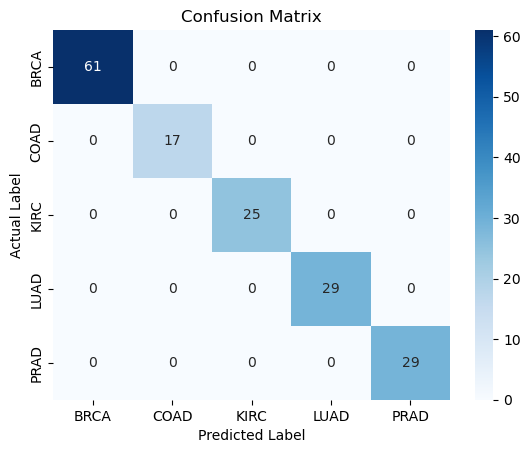

In [90]:
# visualize confusion matrix
sns.heatmap(cm_df, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')
plt.show()

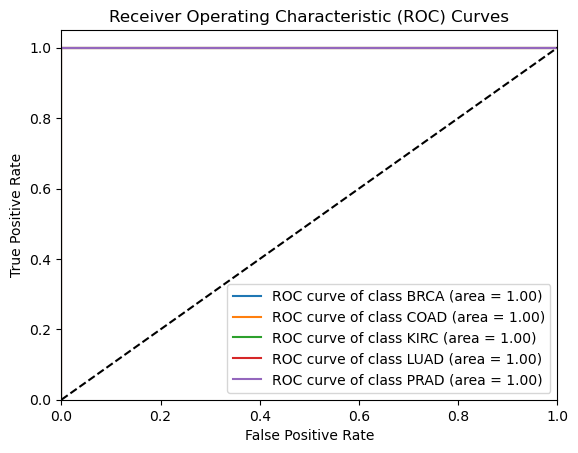

In [91]:
# ROC-AUC for multi-class
Y_test_binarized = label_binarize(Y_test, classes=classes)

# roc curve for each class
fpr = dict()
tpr = dict()
thresholds = dict()
roc_auc = dict()

n_classes = classes.shape[0]
for i in range(n_classes):
    fpr[i], tpr[i], thresholds[i] = roc_curve(Y_test_binarized[:, i], Y_prob[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])
    
    # plot ROC curve
    plt.plot(fpr[i], tpr[i], label='ROC curve of class {0} (area = {1:0.2f})'
                                   ''.format(label[i], roc_auc[i]))
    
plt.plot([0, 1], [0, 1], 'k--')  # diagonal line
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curves')
plt.legend(loc="lower right")
plt.show()